In [1]:
from matplotlib import pyplot as plt
import requests
import numpy as np
# print(plt.style.available)
plt.style.use("fivethirtyeight")


In [2]:
blue_hex="#4e93cc"
green_hex="#115c1d"
red_hex="#61131f"
gray_hex="#292828"
yellow_hex="#bf4006"
orange_hex="#bf4006"
colors = [gray_hex,blue_hex,orange_hex,red_hex,green_hex,yellow_hex]

In [3]:
def get_country_timeline(country_code,dimension='new_daily_cases'):
    url = "https://thevirustracker.com/free-api?countryTimeline={}".format(
        country_code)
    response = requests.get(url).json()
    country = response["countrytimelinedata"][0]["info"]["title"]
    data = response["timelineitems"][0]
    del data['stat']
    dev_x = list(data.keys())
    dev_y = [x[dimension] for x in list(data.values())]
    return (dev_x, dev_y, country)


In [4]:

def plot_daily_cases(*countries):
    for color_index, country in enumerate(countries):
        data = get_country_timeline(country)
        plt.plot(range(len(data[1])), data[1], label=data[2], color=colors[color_index])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel("Days since first case")
    plt.ylabel("Case count per day")
    plt.show()
    return True

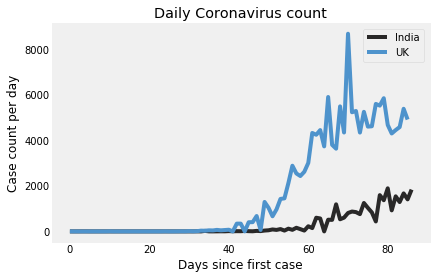

True

In [5]:
plot_daily_cases("IN", "GB")

In [6]:

def plot_daily_cases_bar(country_code, **kwargs):
    data = get_country_timeline(country_code)
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"

    x_axis = range(len(y_axis))
    label = data[2]
    plt.bar(x_axis, y_axis, label=label,color=colors[0])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("Case count per day")
    plt.show()
    return True

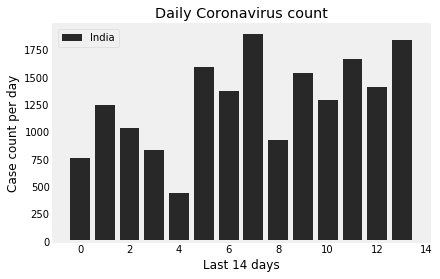

True

In [7]:
plot_daily_cases_bar("IN", last_n_days=14)

In [8]:
def get_death_data(country_code, **kwargs):
    data = get_country_timeline(country_code, "new_daily_deaths")
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"
    x_axis = range(len(y_axis))
    label = data[2] + " Deaths"
    return (x_axis, y_axis, xlabel, label)

def get_recovery_data(country_code, **kwargs):
    data = get_country_timeline(country_code, "total_recoveries")
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"
    x_axis = range(len(y_axis))
    label = data[2] + " Recoveries"
    return (x_axis, y_axis, xlabel, label)
    
def plot_death_and_recoveries(country_code, **kwargs):
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)
    x_axis, y_axis, xlabel, label = get_death_data(country_code, first_n_days=first_n_days, last_n_days=last_n_days)
    plt.bar(x_axis, y_axis, label=label, color=colors[0])
    x_axis, y_axis, xlabel, label = get_recovery_data(country_code, first_n_days=first_n_days, last_n_days=last_n_days)
    plt.plot(x_axis, y_axis, label=label, color=colors[1])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("No of patients")
    plt.show()
    return True

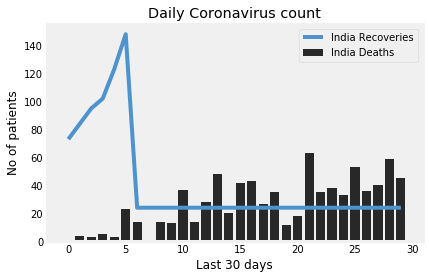

True

In [9]:
plot_death_and_recoveries("IN", last_n_days=30)

In [10]:
def avg_of_last_n_days(arr, n):
    final=[]
    for i in range(len(arr)):
        if (i-n)>-1:
            final.append(np.mean(arr[i-n:i]))
    return [0]*n+final

def plot_daily_cases_versus_nday_avg(country_code, **kwargs):
    data = get_country_timeline(country_code)
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)
    ndays = kwargs.get('ndays', 7)
    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"

    x_axis = range(len(y_axis))
    label = data[2]+" daily count"
    plt.bar(x_axis, y_axis, label=label,color=colors[0])
    y_axis = avg_of_last_n_days(y_axis, ndays)
    plt.plot(range(len(y_axis)), y_axis, label=label+" last {} day mean".format(ndays),color=colors[1])
    
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("Case count per day")
    plt.show()
    return True

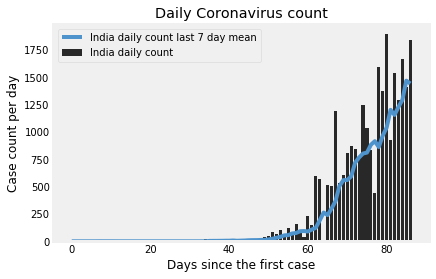

True

In [11]:
plot_daily_cases_versus_nday_avg("IN", ndays=7)

In [24]:

def plot_last10_cases(*countries,**kwargs):
    width = 0.25
    for color_index, country in enumerate(countries):
        data = get_country_timeline(country)
        first_n_days = kwargs.get('first_n_days', 0)
        last_n_days = kwargs.get('last_n_days', 0)
        if ((last_n_days == 0) and (first_n_days > 0)):
            y_axis = data[1][:first_n_days]
            xlabel = "No of cases in First {} days".format(first_n_days)
        elif ((last_n_days > 0) and (first_n_days == 0)):
            y_axis = data[1][-last_n_days:]
            xlabel = "No of cases in Last {} days".format(last_n_days)
        elif ((last_n_days > 0) and (first_n_days > 0)):
            y_axis = data[1][first_n_days:last_n_days]
            xlabel = "No of cases between day {}  and {} ".format(first_n_days,last_n_days)
        else:
            y_axis = data[1]
            xlabel = "Days since the first case"
        plt.bar(np.arange(len(y_axis))+(width*color_index), y_axis, label=data[2], color=colors[color_index], width=width)
    plt.legend()
    plt.grid()
    plt.title(xlabel)
    plt.xlabel("Days")
    plt.ylabel("Cases")
    plt.show()
    return True

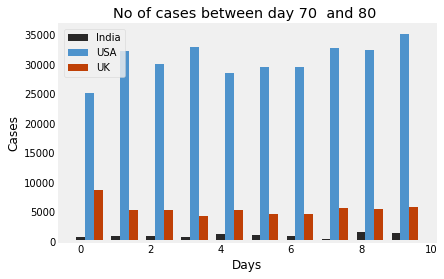

True

In [29]:
plot_last10_cases("IN","US","GB", first_n_days=70, last_n_days=80)